## Загрузим необходимые библиотеки и данные

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
cols = ('day_month_year','data', 'time', 'num_cycle_1st', 'progr_state_1st', 'U_1st', 'I_1st',
                        'num_cycle_2nd', 'progr_state_2nd', 'U_2nd', 'I_2nd',
                        'num_cycle_3rd', 'progr_state_3rd', 'U_3rd', 'I_3rd')
df = pd.read_csv('data/1-20-0.5-5.csv', sep=';', skiprows=[0,1,2], names=cols)


#### Выведем несколько строк таблицы

In [3]:
df.head(10)

,day_month_year,data,time,num_cycle_1st,progr_state_1st,U_1st,I_1st,num_cycle_2nd,progr_state_2nd,U_2nd,I_2nd,num_cycle_3rd,progr_state_3rd,U_3rd,I_3rd
0,19.11.21,19:05:32,1.0,6.0,1023.0,-20.0,1.0,6.0,1023.0,-20.0,1.0,6.0,1023.0,-20.0,NaN
1,19.11.21,19:05:33,1.0,6.0,658.0,-20.0,1.0,6.0,657.0,-20.0,1.0,5.0,49.0,0.0,NaN
2,19.11.21,19:05:34,1.0,6.0,658.0,-20.0,1.0,6.0,656.0,-20.0,1.0,5.0,679.0,0.0,NaN
3,19.11.21,19:05:35,1.0,6.0,657.0,-20.0,1.0,6.0,655.0,-20.0,1.0,5.0,679.0,0.0,NaN
4,19.11.21,19:05:36,1.0,6.0,657.0,-20.0,1.0,6.0,655.0,-20.0,1.0,5.0,680.0,0.0,NaN
5,19.11.21,19:05:37,1.0,6.0,656.0,-20.0,1.0,6.0,655.0,-20.0,1.0,5.0,679.0,0.0,NaN
6,19.11.21,19:05:38,1.0,6.0,656.0,-20.0,1.0,6.0,654.0,-20.0,1.0,5.0,679.0,0.0,NaN
7,19.11.21,19:05:39,1.0,6.0,655.0,-20.0,1.0,6.0,654.0,-20.0,1.0,5.0,680.0,0.0,NaN
8,19.11.21,19:05:40,1.0,6.0,655.0,-20.0,1.0,6.0,654.0,-20.0,1.0,5.0,680.0,0.0,NaN
9,19.11.21,19:05:41,1.0,6.0,655.0,-20.0,1.0,6.0,653.0,-20.0,1.0,5.0,680.0,0.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2849260 entries, 0 to 2849259
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   day_month_year   object 
 1   data             object 
 2   time             float64
 3   num_cycle_1st    float64
 4   progr_state_1st  float64
 5   U_1st            float64
 6   I_1st            float64
 7   num_cycle_2nd    float64
 8   progr_state_2nd  float64
 9   U_2nd            float64
 10  I_2nd            float64
 11  num_cycle_3rd    float64
 12  progr_state_3rd  float64
 13  U_3rd            float64
 14  I_3rd            float64
dtypes: float64(13), object(2)
memory usage: 326.1+ MB


In [5]:
for column in cols:
    unique = df[column].unique()
    if unique.size < 100:
        print((column, unique))

('num_cycle_1st', array([  6.,   0.,   5., -20.,   1.,   4.,  20.,   2.,   3.,  17.,  16.,
        15., -41.,  14.,  13.,  12.,  11.,  nan]))
('U_1st', array([-20.,   0.,   6.,  20.,  19.,  18.,  17.,  16.,  15.,  14.,  13.,
        12.,  11.,  10.,   9.,   8.,   7.,   5.,   4.,   1.,   3.,   2.,
       -41.,  nan]))
('num_cycle_2nd', array([  6.,   0.,   5., -20.,   1.,  20.,   9.,   8.,   7.,   4.,   2.,
         3.,  17.,  15., -41.,  13.,  12.,  18.,  nan]))
('U_2nd', array([-20.,   0.,   6.,  20.,   1.,  19.,  18.,  17.,  16.,  15.,  14.,
        13.,  12.,  11.,  10.,   9.,   8.,   7.,   5.,   4.,   3.,   2.,
       -41.,  nan]))
('num_cycle_3rd', array([  6.,   5.,   0., -20.,   1.,  20.,  14.,   2.,   3., -41.,  10.,
         9.,   8.,   7.,  19.,  18.,  13.,  12.,  11.,   4.,  nan]))
('U_3rd', array([-20.,   0.,  nan,  20.,  19.,  18.,  17.,  16.,  15.,  14.,  13.,
        12.,  11.,  10.,   9.,   8.,   7.,   6.,   5.,   4.,   3.,   2.,
       -41.]))
('I_3rd', array([nan]))


### Произведем проверку на пустоты в нашем наборе данных

In [6]:
df.isnull().sum(axis=0)

day_month_year           0
data                     0
time                     2
num_cycle_1st            1
progr_state_1st          1
U_1st                    1
I_1st                    1
num_cycle_2nd            1
progr_state_2nd          2
U_2nd                    2
I_2nd                    2
num_cycle_3rd            2
progr_state_3rd       3442
U_3rd                 3442
I_3rd              2849260
dtype: int64

Как видно некоторые колонки содержат пустоты,а одна из них вовсе полностью состоит из них

In [7]:
df.drop(columns=['I_3rd'], inplace=True)
df.dropna(inplace=True)
df.isnull().sum(axis=0)

day_month_year     0
data               0
time               0
num_cycle_1st      0
progr_state_1st    0
U_1st              0
I_1st              0
num_cycle_2nd      0
progr_state_2nd    0
U_2nd              0
I_2nd              0
num_cycle_3rd      0
progr_state_3rd    0
U_3rd              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2845817 entries, 0 to 2849258
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   day_month_year   object 
 1   data             object 
 2   time             float64
 3   num_cycle_1st    float64
 4   progr_state_1st  float64
 5   U_1st            float64
 6   I_1st            float64
 7   num_cycle_2nd    float64
 8   progr_state_2nd  float64
 9   U_2nd            float64
 10  I_2nd            float64
 11  num_cycle_3rd    float64
 12  progr_state_3rd  float64
 13  U_3rd            float64
dtypes: float64(12), object(2)
memory usage: 325.7+ MB


### 1. Преобразуем колонки с датой и временем в отдельные
### 2. Переведем data в секунды, где началом отчета будет первая строка t=0
### 3. Найдем сопротивление и мощность АКБ в процессе работы

In [9]:
def date_join(df):
    for spliter, new_cols, old_cols in zip(['.', ':'], 
                                           [['day', 'month', 'year'], ['hour', 'minute', 'second']], 
                                           ['day_month_year', 'data']):

        new_date = pd.DataFrame(list(df[old_cols].apply(lambda a: (map(int, a.split(spliter))))))
        df[new_cols] = new_date
        df.drop(columns=old_cols, inplace=True)
    return df

In [10]:
def create_relative_time_in_seconds(df):
    columns = np.array(df[['day', 'hour', 'minute', 'second']])
    rel_time = np.dot(columns, np.array([24*60*60, 3600, 60, 1]))
    rel_time -= rel_time[0]
    return rel_time
    

In [11]:
def get_resistance(U, I):
    return U / I

In [12]:
def get_power(U, I):
    return U * I

In [13]:
def get_power_and_resistance(df):
    for columns in [df.iloc[:, 3+i:5+i].columns for i in range(0, 10, 4)]:
        U, I = df[columns[0]], df[columns[1]]
        for func, name in zip([get_resistance, get_power], ['P', 'R']):
            df['_'.join([name, columns[0].split('_')[-1]])] = func(U, I)
    return df

In [14]:
def get_new_features(df):
    df['rev_time'] = create_relative_time_in_seconds(df)
    df = get_power_and_resistance(df)
    
    return df

In [15]:
df = date_join(df)

df = get_new_features(df)
cols = df.columns

In [16]:
df

,time,num_cycle_1st,progr_state_1st,U_1st,I_1st,num_cycle_2nd,progr_state_2nd,U_2nd,I_2nd,num_cycle_3rd,...,hour,minute,second,rev_time,P_1st,R_1st,P_2nd,R_2nd,P_3rd,R_3rd
0,1.0,6.0,1023.0,-20.0,1.0,6.0,1023.0,-20.0,1.0,6.0,...,19.0,5.0,32.0,0.0,-20.000000,-20.0,-20.000000,-20.0,-1.052632,-380.0
1,1.0,6.0,658.0,-20.0,1.0,6.0,657.0,-20.0,1.0,5.0,...,19.0,5.0,33.0,1.0,-20.000000,-20.0,-20.000000,-20.0,0.000000,0.0
2,1.0,6.0,658.0,-20.0,1.0,6.0,656.0,-20.0,1.0,5.0,...,19.0,5.0,34.0,2.0,-20.000000,-20.0,-20.000000,-20.0,0.000000,0.0
3,1.0,6.0,657.0,-20.0,1.0,6.0,655.0,-20.0,1.0,5.0,...,19.0,5.0,35.0,3.0,-20.000000,-20.0,-20.000000,-20.0,0.000000,0.0
4,1.0,6.0,657.0,-20.0,1.0,6.0,655.0,-20.0,1.0,5.0,...,19.0,5.0,36.0,4.0,-20.000000,-20.0,-20.000000,-20.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2849254,219.0,2.0,1023.0,20.0,214.0,2.0,1023.0,-41.0,206.0,2.0,...,NaN,NaN,NaN,NaN,0.093458,4280.0,-0.199029,-8446.0,NaN,NaN
2849255,219.0,2.0,1023.0,20.0,214.0,2.0,1023.0,-41.0,206.0,2.0,...,NaN,NaN,NaN,NaN,0.093458,4280.0,-0.199029,-8446.0,NaN,NaN
2849256,219.0,3.0,1023.0,0.0,214.0,2.0,1023.0,-41.0,206.0,2.0,...,NaN,NaN,NaN,NaN,0.000000,0.0,-0.199029,-8446.0,NaN,NaN
2849257,219.0,3.0,1023.0,0.0,214.0,2.0,1023.0,20.0,206.0,2.0,...,NaN,NaN,NaN,NaN,0.000000,0.0,0.097087,4120.0,NaN,NaN


In [17]:
# print(df.isnull().sum(axis=0))
df = df.dropna()

In [18]:
print(df.isnull().sum(axis=0))

time               0
num_cycle_1st      0
progr_state_1st    0
U_1st              0
I_1st              0
num_cycle_2nd      0
progr_state_2nd    0
U_2nd              0
I_2nd              0
num_cycle_3rd      0
progr_state_3rd    0
U_3rd              0
day                0
month              0
year               0
hour               0
minute             0
second             0
rev_time           0
P_1st              0
R_1st              0
P_2nd              0
R_2nd              0
P_3rd              0
R_3rd              0
dtype: int64


Index(['time', 'num_cycle_1st', 'progr_state_1st', 'U_1st', 'I_1st',
       'num_cycle_2nd', 'progr_state_2nd', 'U_2nd', 'I_2nd', 'num_cycle_3rd',
       'progr_state_3rd', 'U_3rd', 'day', 'month', 'year', 'hour', 'minute',
       'second', 'rev_time', 'P_1st', 'R_1st', 'P_2nd', 'R_2nd', 'P_3rd',
       'R_3rd'],
      dtype='object')


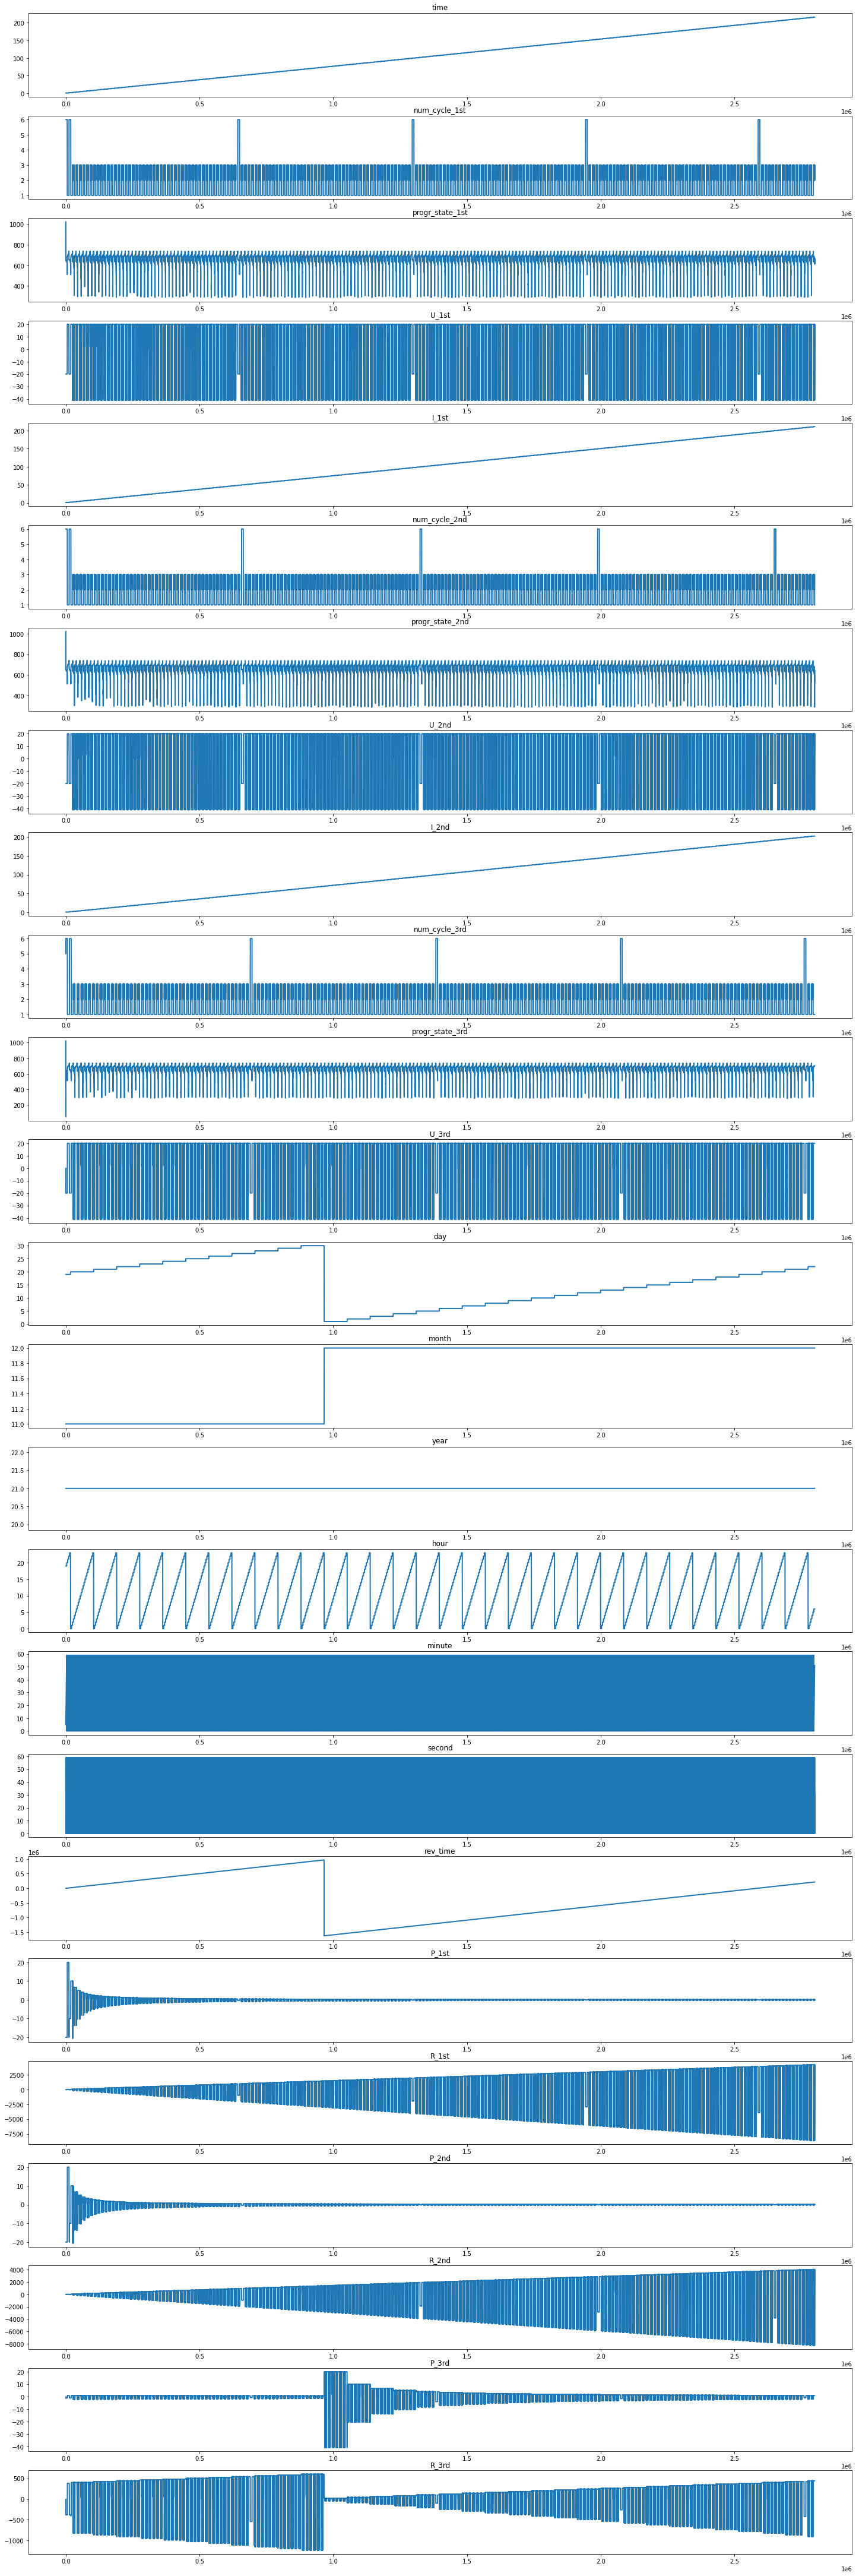

In [22]:

cols_to_plot = cols
print(cols_to_plot)
num_cols = len(cols)
fig, ax = plt.subplots(num_cols, 1, figsize=(20, 60))
fig.tight_layout()

x = np.arange(len(df))[:2800000]


for index, col in enumerate(cols):
    y = df[col][:2800000]
    ax[index].plot(x, y, linewidth=2)
    ax[index].set_title(col)

In [20]:
len(cols)

25